# Introduction

In this project, we will be applying the Data Wrangling steps - Gather, Assess, and Clean - to the WeRateDogs twitter feed and other related data sets explained below. Once we have a clean final dataset, we will analyze the data to generate three insights and at least one visualization.

# Import libraries

In [46]:
import pandas as pd
import numpy as np
import tweepy 
import requests
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

%matplotlib inline

# Gathering the data

We have three data pieces to gather here

1. The Enhanced Twitter Archive feed that has around 2.3 K tweets and this has been enhanced and provided to us directly
2. The Image Predictions file that is downloaded from an URL hosted by Udacity
3. The Twitter API data (retweet count and favorite count) 

### First data piece to gather: The Enhanced Twitter Archive feed

In [2]:
#This file was downloaded using the link given and then uploaded to this workbook

base_tweets = pd.read_csv('twitter-archive-enhanced.csv')
base_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
base_tweets.info() #lot of missing values for some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Second data piece to gather: The Image Predictions file

In [3]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
print(r.headers.get('content-type')) 

text/tab-separated-values; charset=utf-8


In [5]:
open('image_data.tsv', 'wb').write(r.content) #write to a file
image_predictions = pd.read_csv('image_data.tsv', sep = '\t') #read from the file
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
image_predictions.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Third data piece to gather: Tweet data from Twitter API using Tweepy

In [6]:
#set up the Twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
#using the stackoverflow link, check one tweet. NICE!
tweet = api.get_status(892177421306343426)
print(tweet.text)

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L


In [9]:
#writing the JSON formatted tweets to a file
missing = 0
valid = 0

tweets = base_tweets.tweet_id.values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweets:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
            valid += 1
        except tweepy.TweepError:
            missing += 1

print('Number of missing tweets are {}'.format(missing))
print('Number of valid tweets are {}'.format(valid))


Rate limit reached. Sleeping for: 672
Rate limit reached. Sleeping for: 727
Number of missing tweets are 25
Number of valid tweets are 2331


In [6]:
#Converting the JSON file to a pandas dataframe
json_data = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        data_by_tweet = json.loads(line)
        
        #there are lot of variables but we are extracting two of interest and the 'id' to join to main dataset
        data_by_tweet_id = data_by_tweet['id']
        data_by_tweet_retweet_cnt = data_by_tweet['retweet_count']
        data_by_tweet_fav_cnt = data_by_tweet['favorite_count']
        
        #append to empty list
        json_data.append({'tweet_id': data_by_tweet_id, 
                          'retweet_cnt': data_by_tweet_retweet_cnt, 
                          'favorite_cnt': data_by_tweet_fav_cnt})

print(type(json_data)) #list of dictionaries
len(json_data) #2331 tweets; 2356 valid from base twitter feed - 25 missing = 2331 final
json_data[1] #each key should become a column

<class 'list'>


{'tweet_id': 892177421306343426, 'retweet_cnt': 5769, 'favorite_cnt': 31529}

In [7]:
#convert to dataframe
df_tweet_extra = pd.DataFrame(json_data, 
                                   columns = ['tweet_id',
                                              'retweet_cnt',
                                              'favorite_cnt'])

#df_tweet_extra.shape #2331 and 3
df_tweet_extra.head()

,tweet_id,retweet_cnt,favorite_cnt
0,892420643555336193,7789,36596
1,892177421306343426,5769,31529
2,891815181378084864,3818,23754
3,891689557279858688,7960,39922
4,891327558926688256,8595,38116


That concludes the Gathering part. Moving on to Assessing!

# Assessing the data

In this section, we will assess the three different data pieces collected above. We will examine each data piece for quality and tidiness issues. 
In the next section, we will clean the said issues.

We would need to merge the three datasets together after assessing the issues with each data set.

### Enhanced Twitter Archive data

In [8]:
base_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
base_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Using the info() method, we can note down a few points -

1. Timestamp is of string data type
2. There are 181 retweets and 78 replies. In this project, we will only analyze actual tweets so we won't be using these columns or records
3. There are 4 columns (doggo, floofer, pupper, puppo) for dog state. This can be represented in one column
4. Expanded_urls are null for about 60 records and all other relevant columns are well populated

Observing further...

In [8]:
base_tweets.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


5. The name column seems to have incorrect names like 'a', 'None' etc.
6. The columns to represent the dog's stage are None for all three records. We can investigate how well populated this columns are

Now we can dig deeper into a few important columns and see if they are clean -

In [5]:
#numerator and denominator

base_tweets.rating_numerator.value_counts(normalize=True) 

12      0.236842
11      0.196944
10      0.195671
13      0.148981
9       0.067063
8       0.043294
7       0.023345
14      0.022920
5       0.015705
6       0.013582
3       0.008065
4       0.007216
1       0.003820
2       0.003820
420     0.000849
0       0.000849
15      0.000849
75      0.000849
80      0.000424
20      0.000424
24      0.000424
26      0.000424
44      0.000424
50      0.000424
60      0.000424
165     0.000424
84      0.000424
88      0.000424
144     0.000424
182     0.000424
143     0.000424
666     0.000424
960     0.000424
1776    0.000424
17      0.000424
27      0.000424
45      0.000424
99      0.000424
121     0.000424
204     0.000424
Name: rating_numerator, dtype: float64

In [22]:
valid_denom = base_tweets.query('rating_denominator == 10')
valid_denom.shape[0] #2333
valid_denom.query('rating_numerator >= 5 and rating_numerator <= 14').shape[0]
#2268 out of the valid 2333 are fine 

2268

In [12]:
base_tweets.rating_denominator.value_counts(normalize=True) 

10     0.990238
11     0.001273
50     0.001273
80     0.000849
20     0.000849
2      0.000424
16     0.000424
40     0.000424
70     0.000424
15     0.000424
90     0.000424
110    0.000424
120    0.000424
130    0.000424
150    0.000424
170    0.000424
7      0.000424
0      0.000424
Name: rating_denominator, dtype: float64

7. Rating numerator values are expected to be above 10 since that is how WeRateDogs does it.. and 95% of them are within expected values (I think from 5-14 is an expected range!)
8. 99% of records for denominator have  values are 10 but the remaining can be either removed or manually looked into. Looking into few below just for fun! (seems like multiple pups) but I plan to just remove them if needed

In [21]:
print(base_tweets[base_tweets['rating_denominator']>10].text)

342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1663    I'm aw

In [13]:
#name
base_tweets.name.value_counts(normalize=True)

None        0.316214
a           0.023345
Charlie     0.005093
Cooper      0.004669
Lucy        0.004669
Oliver      0.004669
Penny       0.004244
Lola        0.004244
Tucker      0.004244
Bo          0.003820
Winston     0.003820
Sadie       0.003396
the         0.003396
Buddy       0.002971
an          0.002971
Daisy       0.002971
Bailey      0.002971
Toby        0.002971
Scout       0.002547
Jack        0.002547
Dave        0.002547
Stanley     0.002547
Leo         0.002547
Milo        0.002547
Koda        0.002547
Jax         0.002547
Oscar       0.002547
Rusty       0.002547
Bella       0.002547
Finn        0.002122
              ...   
Striker     0.000424
Doobert     0.000424
Huxley      0.000424
Zuzu        0.000424
Rorie       0.000424
Cupid       0.000424
Darrel      0.000424
Pluto       0.000424
Lance       0.000424
Georgie     0.000424
Wafer       0.000424
Spark       0.000424
Sunshine    0.000424
Swagger     0.000424
Lugan       0.000424
Peanut      0.000424
Autumn      0

9. 31% of records have no name and there are incorrect names like 'a' etc. However this column might not really be useful too, so we will not look too much here


In [22]:
# stages of dog columns
print(base_tweets.doggo.value_counts(normalize=True))
print(base_tweets.pupper.value_counts(normalize=True))
print(base_tweets.floofer.value_counts(normalize=True))
print(base_tweets.puppo.value_counts(normalize=True))

None     0.958829
doggo    0.041171
Name: doggo, dtype: float64
None      0.890917
pupper    0.109083
Name: pupper, dtype: float64
None       0.995756
floofer    0.004244
Name: floofer, dtype: float64
None     0.987267
puppo    0.012733
Name: puppo, dtype: float64


10. These 4 columns are predominantly empty but pupper has the most valid records at 11%. Floofer has just 0.4% records populated. We might not use these columns in our analysis

In [13]:
#how many records have more than 1 category populated? Not much.

smaller = base_tweets[['tweet_id','doggo','pupper','floofer','puppo']].copy()
smaller.groupby(['doggo','pupper','floofer','puppo'])['tweet_id'].count()

doggo  pupper  floofer  puppo
None   None    None     None     1976
                        puppo      29
               floofer  None        9
       pupper  None     None      245
doggo  None    None     None       83
                        puppo       1
               floofer  None        1
       pupper  None     None       12
Name: tweet_id, dtype: int64

### Image Predictions data

In [14]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [43]:
image_predictions.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


1. There are no columns with NULL values 
2. We have 2075 records here and the base twitter has 2356 so the match is not a 100% but that is not a problem. We can use whatever data overlaps
3. The probability columns are interesting. The data dictionary says p1 is the first choice based on probability and p2 is second etc. In that case, we need not retain p2 and p3 columns at all. Making sure p1_conf is always the highest below. It is, so we will use the 'p1' guess only

In [44]:
image_predictions.query('p2_conf > p1_conf' or 'p3_conf > p2_conf')
#returns nothing. so p1 > p2 > p3

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


4. I am also interested to see how many times the guess is NOT a dog. ~70% of the times the guess is a dog, so we need to see how the other 30% look and if we should use those records or not

In [55]:
print(image_predictions.p1_dog.value_counts(normalize=True))
print(image_predictions.p2_dog.value_counts(normalize=True))
print(image_predictions.p3_dog.value_counts(normalize=True))

True     0.738313
False    0.261687
Name: p1_dog, dtype: float64
True     0.748434
False    0.251566
Name: p2_dog, dtype: float64
True     0.72241
False    0.27759
Name: p3_dog, dtype: float64


In [116]:
#store incorrect tweet IDs
pd.options.display.max_rows = 4000

incorrect = image_predictions[image_predictions['p1_dog'] == False]['tweet_id']
base_tweets[base_tweets.tweet_id.isin(incorrect)]['expanded_urls']
    
#seeing one example
base_tweets.iloc[399].expanded_urls

'https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1'

5. Expanded_urls is looking a lit incorrect by seeing the example above. Why is the same URL repeated so many times? (for the base archive data)

6. The image_predictions data also has a JPG column. Which might not really be useful actually

In [120]:
image_predictions.iloc[399].jpg_url # a cute little dog!

'https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg'

In [127]:
#looking into how many tweets had more than 1 image. 
#295 tweets out of 2095; 15%
image_predictions[image_predictions['img_num'] > 1]['tweet_id'].count()

295

7. 15% of tweets had more than 1 image

### Retweet Cnt and Favorite Cnt data from Twitter API

In [15]:
df_tweet_extra.head()

,tweet_id,retweet_cnt,favorite_cnt
0,892420643555336193,7789,36596
1,892177421306343426,5769,31529
2,891815181378084864,3818,23754
3,891689557279858688,7960,39922
4,891327558926688256,8595,38116


In [133]:
df_tweet_extra.shape #expected

(2331, 3)

In [134]:
df_tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id        2331 non-null int64
retweet_cnt     2331 non-null int64
favorite_cnt    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


1. There are 25 records lesser than the base archive data and that is expected since 25 tweets were missing when using the Twitter APT
2. All records are valid and of valid data type

Exploring further

In [136]:
df_tweet_extra[['retweet_cnt','favorite_cnt']].describe()

,retweet_cnt,favorite_cnt
count,2331.000000,2331.000000
mean,2737.547834,7646.538396
std,4629.342342,11864.565340
min,1.000000,0.000000
25%,553.500000,1336.000000
50%,1286.000000,3328.000000
75%,3185.500000,9381.500000
max,78766.000000,158122.000000


3. The values are reasonable and the difference betweent he 75%ile and the maximum value is quite stark meaning there are some clear outliers as shown below

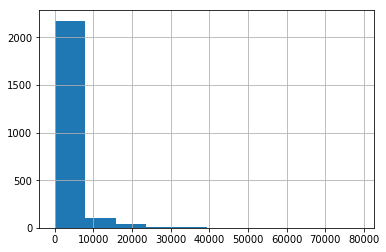

In [139]:
df_tweet_extra['retweet_cnt'].hist();

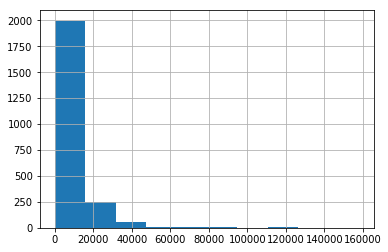

In [140]:
df_tweet_extra['favorite_cnt'].hist();

### Final assessments as required by the project (8 quality and 2 tidy issues):

Quality:

1. The 'timestamp' column in the Enhanced Twitter Archive data is not of datetime data type
2. 1% of the records in the Enhanced Twitter Archive data have a denominator that is not 10. These seem to be pictures of multiple dogs; just a note
3. Considering just records with the denominator 10 (2333 out of 2356), 2268 have a numerator rating between 5 and 14 which can be considered within range
4. There are 181 retweets in the Enhanced Twitter Archive data ('retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp') which are not within the scope of our analysis since we consider only actual tweets
5. There are 78 reply tweets in the Enhanced Twitter Archive data ('in_reply_to_status_id' and 'in_reply_to_user_id') which are not within the scope of our analysis since we consider only actual tweets
6. 59 tweets have missing values for the 'expanded_urls' column in the Enhanced Twitter Archive data
7. In the Image Predictions data, p2/p3 variables are redundant since we are sure that p1 is the highest confidence, so we can just retain the p1 columns. This is just my perspective on these columns
8. If p1_dog is False, we cannot be confident of the categorization there. We can verify and delete such records


Tidiness:

1. There are 4 columns (doggo, floofer, pupper, puppo) in the Enhanced Twitter Archive data to represent a dog's stage but we can represent this in one column. We already confirmed above that only few records have multiple categories for a dog, so we can ignore them and pick one final category per dog to restructure the data
2. After cleaning the above issues, a lot of columns become irrelevant. So we can drop them from the tables. We should also combine the different tables together to create one final clean table and non-matching records will be assigned as missing

Other points worth noting:

1. Once we fix the denominator at 10, we no longer need that column in the Enhanced Twitter Archive data
2. After removing retweets and replies, we no longer need those columns
3. Ideally the numerical columns in the Enhanced Twitter Archive data need to be towards the right since it is easier to traverse a dataset that way

# Cleaning the data

Now that we have a better understanding of the different issues in the datasets, we can go about cleaning them individually and then joining the three datasets together.

We will be defining the problem, coding the solution, and testing the solution (define-code-test) for each issue at a time.

In [16]:
#We will create three copies of the above datasets to store the final clean versions
base_tweets_clean = base_tweets.copy()
image_predictions_clean = image_predictions.copy()
df_tweet_extra_clean = df_tweet_extra.copy()

### Quality issues

#### Issue 1 - timestamp column in Enhanced Twitter Archive data

Define 

The timestamp column in the Enhanced Twitter Archive feed is of a string datatype. This needs to be converted to a datetime format

Code

In [17]:
base_tweets_clean['timestamp'] = pd.to_datetime(base_tweets_clean.timestamp)

Test

In [18]:
base_tweets_clean.info()
#timestamp                     2356 non-null datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Issue 2 - denominator rating in Enhanced Twitter Archive feed

Define

1% of the records in the data have a denominator rating <> 10. We will remove such records

Code

In [19]:
base_tweets_clean = base_tweets_clean[base_tweets_clean.rating_denominator == 10]

Test

In [20]:
base_tweets_clean.rating_denominator.value_counts() #visual approach
assert base_tweets_clean.rating_denominator.any() != 10 #programmatic approach

#### Issue 3 - numerator rating in Enhanced Twitter Archive feed

Define

2.5% of records in the data have a numerator rating <=5 and >= 14. We will consider them as outliters and remove from the data.

Code

In [21]:
base_tweets_clean = base_tweets_clean[base_tweets_clean.rating_numerator.between(5,14)]

Test

In [22]:
assert base_tweets_clean.rating_numerator.between(5,14).all() #programmatic approach
base_tweets_clean.rating_numerator.value_counts() #visual approach

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

#### Issue 4 - Retweets in the Enhanced Twitter Archive data

Define

There are retweets in the Enhanced Twitter Archive data and they are identified by non-null values in the following columns (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp). Removing them since they are not within the scope of this project

Code

In [23]:
base_tweets_clean = base_tweets_clean[base_tweets_clean.retweeted_status_id.isna()]

Test

In [24]:
assert base_tweets_clean.retweeted_status_id.notnull().sum() == 0
assert base_tweets_clean.retweeted_status_user_id.notnull().sum() == 0
assert base_tweets_clean.retweeted_status_timestamp.notnull().sum() == 0

#### Issue 5 - Replies in the Enhanced Twitter Archive feed

Define

There are a few replies in this dataset which are identified by non-null values in the 'in_reply_to_status_id ' column. Removing them since we are analyzing only actual tweets

Code

In [25]:
base_tweets_clean = base_tweets_clean[base_tweets_clean.in_reply_to_status_id.isna()]

Test

In [26]:
assert base_tweets_clean.in_reply_to_status_id.notnull().sum() == 0
assert base_tweets_clean.in_reply_to_user_id.notnull().sum() == 0

#### Issue 6 - expanded_urls column has missing values in the Enhanced Twitter Data feed

Define

59 records have missing values for the 'expanded_urls' column. We are dropping them given the low number

Code

In [27]:
base_tweets_clean = base_tweets_clean[base_tweets_clean.expanded_urls.notnull()]

Test

In [28]:
base_tweets_clean.info() #all valid columns are not null now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2024 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2024 non-null datetime64[ns]
source                        2024 non-null object
text                          2024 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2024 non-null object
rating_numerator              2024 non-null int64
rating_denominator            2024 non-null int64
name                          2024 non-null object
doggo                         2024 non-null object
floofer                       2024 non-null object
pupper                        2024 non-null object
puppo                         2024 non-null object
dtypes: datetime64[ns](1), float

#### Issue 7 - redundant columns in the Image Predictions file

Define

Since p1 variables are of the highest confidence, we can remove the other variables to simplify the table

Code

In [29]:
cols_to_drop = ['jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_dog', 'p3_conf']
image_predictions_clean.drop(cols_to_drop, inplace=True, axis=1)

Test

In [30]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id    2075 non-null int64
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 66.9+ KB


#### Issue 8 - tweets with p1_dog set to False

Define

There are tweets where the p1_dog (p1_dog is whether or not the prediction is a breed of dog) is False. We cannot trust such records, so removing them

Code

In [31]:
image_predictions_clean = image_predictions_clean[image_predictions_clean.p1_dog == True]

Test

In [32]:
image_predictions_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [33]:
#Reviewing how many records we dropped here: 543 records
len(image_predictions_clean) - len(image_predictions)

-543

### Tidy issues

#### Issue 1 - multipe columns for dog stages

Define

We have 4 columns in the Enhanced Twitter Archive data (doggo, floofer, pupper, puppo) that can be combined into one column

Code

In [34]:
#define a function to replicate case when statements. We will pick in the below
#order since most records have just 1 categorization or are all NULL

def stage_name(row):
    if row['doggo'] == 'doggo':
        return 'doggo'
    elif row['floofer'] == 'floofer':
        return 'floofer' 
    elif row['pupper'] == 'pupper':
        return 'pupper'
    elif row['puppo'] == 'puppo':
        return 'puppo'
    else:
        return None

#apply the function to each row
base_tweets_clean['stage'] = base_tweets_clean.apply(stage_name, axis=1)

Test

In [35]:
print(base_tweets_clean.doggo.value_counts())
print(base_tweets_clean.pupper.value_counts())
print(base_tweets_clean.puppo.value_counts())
print(base_tweets_clean.floofer.value_counts())
print(base_tweets_clean.stage.value_counts())
#they do not match exactly but close enough since our logic above is not 100% accurate

None     1941
doggo      83
Name: doggo, dtype: int64
None      1797
pupper     227
Name: pupper, dtype: int64
None     2000
puppo      24
Name: puppo, dtype: int64
None       2014
floofer      10
Name: floofer, dtype: int64
pupper     218
doggo       83
puppo       23
floofer      9
Name: stage, dtype: int64


#### Issue 2 - merge datasets and drop irrelevant columns

Define

The Enhanced Twitter Archive and Image Predictions data contain some unnnecessary columns. Drop them and combine all three tables together

Code

In [36]:
#view all columns of all tables first
print(base_tweets_clean.info()) #retweet cols, reply cols, and individual stage columns can be removed
print(image_predictions_clean.info()) #p1_dog can be removed
print(df_tweet_extra_clean.info()) #no extra columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2024 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2024 non-null datetime64[ns]
source                        2024 non-null object
text                          2024 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2024 non-null object
rating_numerator              2024 non-null int64
rating_denominator            2024 non-null int64
name                          2024 non-null object
doggo                         2024 non-null object
floofer                       2024 non-null object
pupper                        2024 non-null object
puppo                         2024 non-null object
stage                         33

In [37]:
#Enhanced Twitter Archive data
cols_drop_1 = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','pupper','puppo','floofer']
base_tweets_clean.drop(cols_drop_1, inplace = True, axis = 1)

#Image Predictions data
cols_drop_2 = ['p1_dog']
image_predictions_clean.drop(cols_drop_2, inplace = True, axis = 1)

#Twitter APT data
#no changes

In [38]:
#Combine the tables together

final_clean_tweets = pd.merge(left=base_tweets_clean,right=image_predictions_clean, left_on='tweet_id', right_on='tweet_id', how='left')
final_clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2023
Data columns (total 12 columns):
tweet_id              2024 non-null int64
timestamp             2024 non-null datetime64[ns]
source                2024 non-null object
text                  2024 non-null object
expanded_urls         2024 non-null object
rating_numerator      2024 non-null int64
rating_denominator    2024 non-null int64
name                  2024 non-null object
stage                 333 non-null object
img_num               1438 non-null float64
p1                    1438 non-null object
p1_conf               1438 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 205.6+ KB


In [39]:
final_clean_tweets = pd.merge(left=final_clean_tweets,right=df_tweet_extra_clean, left_on='tweet_id', right_on='tweet_id', how='left')
final_clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2023
Data columns (total 14 columns):
tweet_id              2024 non-null int64
timestamp             2024 non-null datetime64[ns]
source                2024 non-null object
text                  2024 non-null object
expanded_urls         2024 non-null object
rating_numerator      2024 non-null int64
rating_denominator    2024 non-null int64
name                  2024 non-null object
stage                 333 non-null object
img_num               1438 non-null float64
p1                    1438 non-null object
p1_conf               1438 non-null float64
retweet_cnt           2017 non-null float64
favorite_cnt          2017 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 237.2+ KB


Test

In [40]:
final_clean_tweets.info()

#The retweet and favorite count data joined exactly as expdected and only 7 records are NULL
#However, the image predictions data did not join fully as expected and only 1438/1532 tweets joined
#We cant do much about it, so this will be our final dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2023
Data columns (total 14 columns):
tweet_id              2024 non-null int64
timestamp             2024 non-null datetime64[ns]
source                2024 non-null object
text                  2024 non-null object
expanded_urls         2024 non-null object
rating_numerator      2024 non-null int64
rating_denominator    2024 non-null int64
name                  2024 non-null object
stage                 333 non-null object
img_num               1438 non-null float64
p1                    1438 non-null object
p1_conf               1438 non-null float64
retweet_cnt           2017 non-null float64
favorite_cnt          2017 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 237.2+ KB


In [42]:
final_clean_tweets.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,img_num,p1,p1_conf,retweet_cnt,favorite_cnt
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,NaN,NaN,7789.0,36596.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.0,Chihuahua,0.323581,5769.0,31529.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.0,Chihuahua,0.716012,3818.0,23754.0


In [43]:
# Save clean DataFrame to csv file
final_clean_tweets.to_csv('twitter_archive_master.csv')

# Analysis and Visualization

The final dataset contains ~2K records and a number of interesting columns. Few interesting questions that come to mind:

1. Is there a correlation between rating and retweet/favorite count? In addition, is there a correlation between retweet count and favorite count?
2. How have the ratings changed over time?
3. Are there specific days of the week with a higher rating?
4. Do tweets where the image was classified (p1 is not null) have higher ratings? Maybe the image is very clear and hence a better rating
5. Does the length of the text have an effect on rating?
6. Ignoring invalid names, are there certain names that are more popular?
7. Ignoring null 'stages', how do other dog stages relate with rating?
8. How are ratings distributed? Is there a skew?
9. Are top retweeted tweets the same as the top favorited tweets?
10. Which dog breeds are more populate?

Out of these 10, I will be choosing 3 questions to analyze/visualize (if necessary) the data.

#### Insight 1: How is the 'rating_numerator' distributed?

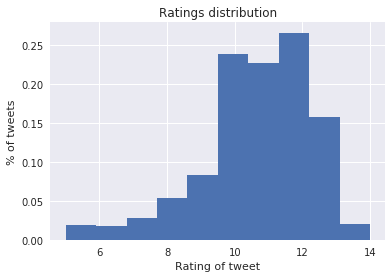

In [55]:
final_clean_tweets['rating_numerator'].plot(kind = 'hist', density=1)
plt.ylabel('% of tweets')
plt.xlabel('Rating of tweet')
plt.title('Ratings distribution')
plt.show();

We can see that most of the values fall between 10 and 12 which is also confirmed by the table below.

In [56]:
final_clean_tweets['rating_numerator'].describe()

count    2024.000000
mean       10.789032
std         1.812915
min         5.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

#### Insight 2: What are the top 10 most popular dog breeds when it comes to tweeting?

We will exclude the 'none' category here since it is pointless to consider that

In [60]:
#removing none from p1
final_clean_tweets_breeds = final_clean_tweets[final_clean_tweets['p1'].notnull()]
final_clean_tweets_breeds.p1.isnull().sum()

0

In [75]:
top10_breeds = final_clean_tweets_breeds.p1.value_counts().head(10)
top10_breeds

golden_retriever      134
Labrador_retriever     91
Pembroke               87
Chihuahua              77
pug                    53
chow                   41
Samoyed                40
toy_poodle             37
Pomeranian             37
malamute               29
Name: p1, dtype: int64

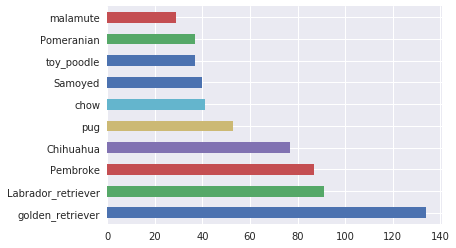

In [80]:
top10_breeds.plot(kind='barh');

Looks like Golden Retriever and Labrador Retriever are the most populate dogs and if you look at the American Kettle Dog website, they are the top 2 breeds!

#### Insight 3: How is the correlation between retweet count and favorite count?

I would expect tweets that are highly retweeted to also be highly favorited and vice versa. Checking it out visually below and also looking at top 5 examples below.

Text(0,0.5,'Retweet cnt (log10)')

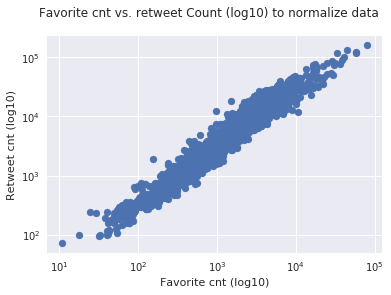

In [85]:
plt.scatter(final_clean_tweets['retweet_cnt'], final_clean_tweets['favorite_cnt'])
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Favorite cnt vs. retweet Count (log10) to normalize data')
plt.xlabel('Favorite cnt (log10)')
plt.ylabel('Retweet cnt (log10)')

#took help from a fellow student's plot here: https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project/blob/master/wrangle_act.ipynb

Looks like there is a very strong positive correlation between the two columns! I am comparing the top 5 mostly retweeted/favorited tweets below to see if they are the same

In [89]:
final_clean_tweets.sort_values(by = 'retweet_cnt', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,img_num,p1,p1_conf,retweet_cnt,favorite_cnt
812,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,1.0,Labrador_retriever,0.825333,78766.0,158122.0
850,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,1.0,Eskimo_dog,0.503372,58408.0,116806.0
415,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,1.0,Chihuahua,0.505370,57454.0,122088.0
323,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,1.0,Lakeland_terrier,0.196015,44407.0,134784.0
60,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,1.0,English_springer,0.383404,41063.0,100313.0


In [90]:
final_clean_tweets.sort_values(by = 'favorite_cnt', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,img_num,p1,p1_conf,retweet_cnt,favorite_cnt
812,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,1.0,Labrador_retriever,0.825333,78766.0,158122.0
323,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,1.0,Lakeland_terrier,0.196015,44407.0,134784.0
415,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,1.0,Chihuahua,0.505370,57454.0,122088.0
115,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,2.0,French_bulldog,0.905334,33344.0,117654.0
850,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,1.0,Eskimo_dog,0.503372,58408.0,116806.0


2/5 tweets are the same and the tweet that is the highest retweeted is also the highest favorited! Link below - It is about a dog swimming and realizing the dog can stand in the pool! Haha!

In [91]:
final_clean_tweets.iloc[812].expanded_urls

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

# Conclusion

In this project, we have gathered data from three different sources, assessed the issues in each and cleaned the most important issues. 

With the clean data in hand, we generated a few interesting insights and visualizations!